In [ ]:
%cd 'drive/My Drive/LearningCorner/FreeCodeCamp/Data Analysis with Python'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',index_col='date')
df.index = pd.to_datetime(df.index)
df.head()

In [ ]:
df.describe()

In [ ]:
df['value'].quantile(0.025)

In [ ]:
df.shape

In [ ]:
# Clean data
cond1 = df['value'] >= df['value'].quantile(0.025)
cond2 = df['value'] <= df['value'].quantile(0.975)
df = df.loc[cond1 & cond2]
df.shape

In [ ]:
def draw_line_plot():
    # Draw line plot
    fig = plt.figure(figsize=(18,9))
    plt.plot(df.index,df['value'])
    plt.xlabel('Data')
    plt.ylabel('Page Views')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

In [ ]:
fig_1 = draw_line_plot()

In [ ]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.groupby([df.index.year,df.index.month]).mean()
    df_bar.index = df_bar.index.rename(['Year', 'Months'])
    df_bar = df_bar.reset_index(level=['Year','Months'])
    df_bar = df_bar.pivot(index='Year', columns='Months', values='value')
    df_bar.rename(columns={
          1: "January",
          2: "Febuary",
          3: "March",
          4: "April",
          5: "May",
          6: "June",
          7: "July",
          8: "August",
          9: "September",
          10: "October",
          11: "November",
          12: "December"}, 
          inplace=True)
    df_bar = df_bar.reset_index(level=['Year'])

    # Draw bar plot
    fig = plt.figure(figsize=(18,9))
    df_bar.plot(x='Year', kind='bar', stacked=False, figsize=(11,9), title='Grouped Bar Graph with dataframe')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

In [ ]:
fig_2 = draw_bar_plot()

In [34]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box['Year'] = df_box.index.year
    df_box['Month'] = df_box.index.month
    df_box.rename(columns={'value':'Page Values'},inplace=True)

    month_dict = {
          1: "Jan",
          2: "Feb",
          3: "Mar",
          4: "Apr",
          5: "May",
          6: "Jun",
          7: "Jul",
          8: "Aug",
          9: "Sep",
          10: "Oct",
          11: "Nov",
          12: "Dec"}

    dfbm = df_box.sort_values("Month", ascending=True)
    dfbm['Month'].replace(month_dict,inplace=True)

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(18, 9))

    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[1].set_title("Month-wise Box Plot (Seasonality)")

    sns.boxplot(ax=axes[0], data=df_box,x='Year',y='Page Values')
    sns.boxplot(ax=axes[1], data=dfbm,x='Month',y='Page Values')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

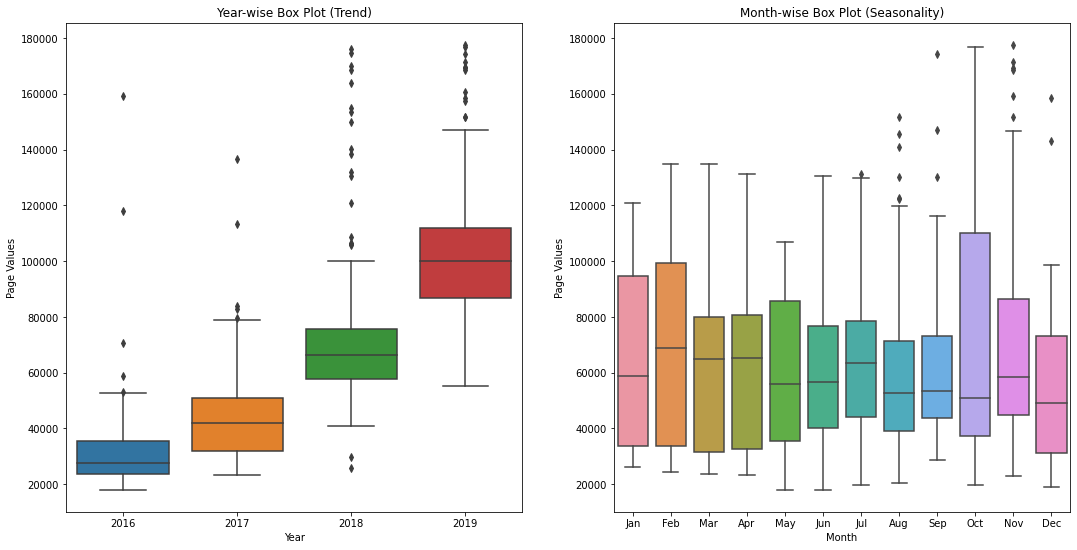

In [35]:
fig_3 = draw_box_plot()